# Create a simple boxplot with CairoMakie

### Background
A boxplot displays summary statistics for a variable. It shows the median, and the bounds of the box depict the 1st and 3rd quartiles. The whiskers span a length of `1.5*IQR`, and potential outliers, i.e., data points outside the error, are highlighted. Other styles of error bars can plot the extrema, variance, and other desired summary statistics. The height of the notch approximates the .95 CI for the median. This is a way to visually depict statistically significant (p<0.05) differences; they are depicted as non-overlapping notches two groups do not ovelap. 

The "dodge" is used to define within-group distinctions, e.g., "pre" and "post". 

### Coding a boxplot

1. **Using CairoMakie**

2. **Initialize plot with `Figure()`, and `Axis()`**
    - To label axes in `Axis()` function, define:
        - `xlabel`, `ylabel`, and `xticks`

3. **Define variables and simulate data**
    - `categories` is an array of 1000 random integers from the set {1, 2, 3}.
    - `values` is an array of 1000 random numbers from a standard normal distribution.
    - `dodge` is an array of 1000 random integers from the set {1, 2}.

4. **Call boxplot**
    - `boxplot(x, y; kwargs)`
        - Key words `dodge` and `color` used to split and color code the data (in this case according to the dodge condition)
        - `show_notch` can be used if desired. 

5. **Add a legend**
    - Create a list of objects (`elems`) to assign a marker to each group. 
    - Use `axislegend(ax, args...; position = :rt, kwargs...)` to insert the legend. 

6. **Display the figure**
    s


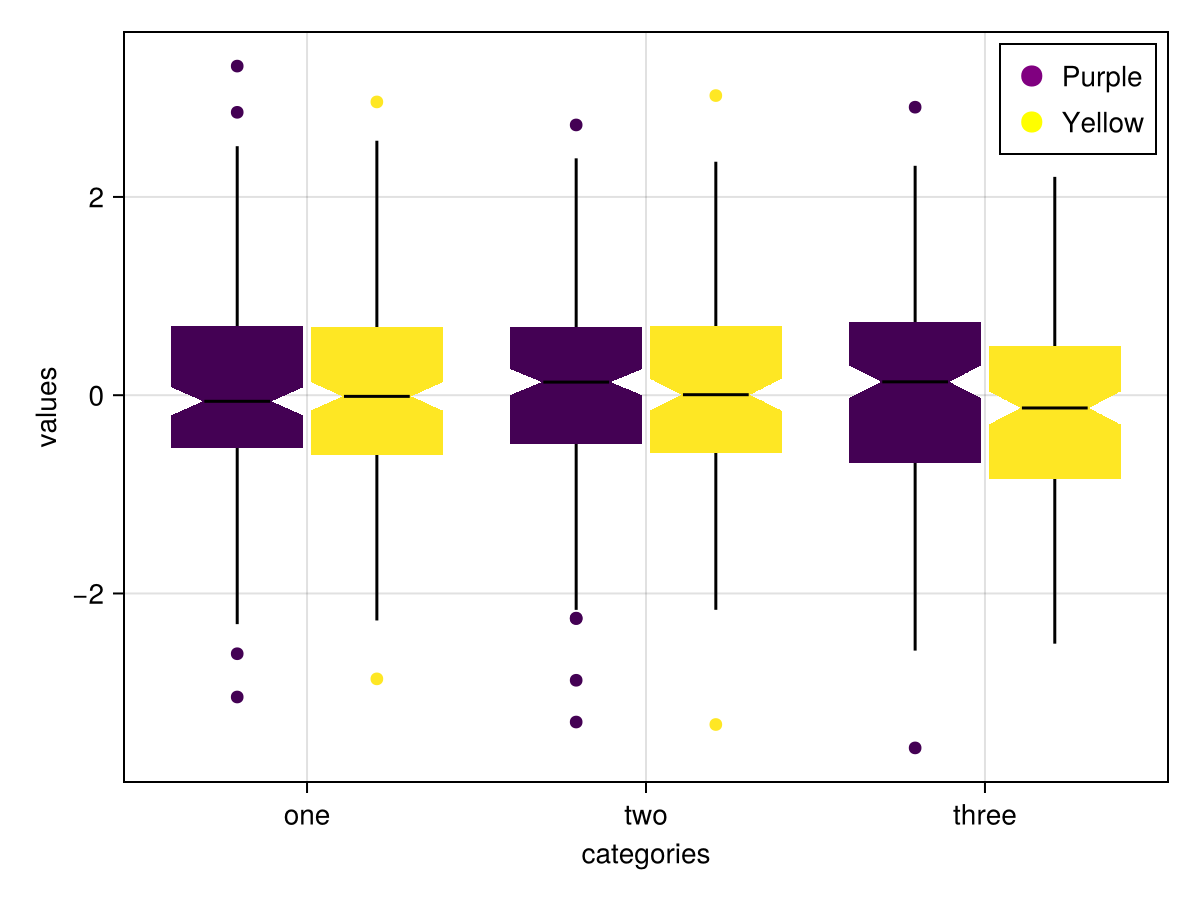

In [2]:

using CairoMakie

# initialize plot Figure and Axis

f = Figure()
ax = Axis(f[1,1];
    xlabel = "categories",
    ylabel = "values",
    xticks = (1:3, ["one", "two", "three"])  
)

# Define variables, simulate data

categories = rand(1:3, 1000)
values = randn(1000)
dodge = rand(1:2, 1000)

# boxplot

boxplot!(ax, categories, values, 
        dodge = dodge,          # define the sub-category by which to split the data
        color = dodge,          # Set the color according to the dodge group
        show_notch = true)      # show notch argument

# add legend 


elems = [[MarkerElement(color = :Purple, marker=:circle, markersize = 15,       # build the marker elements
      strokecolor = :black)],[MarkerElement(color = :Yellow, marker=:circle, markersize = 15,
      strokecolor = :black)]]

axislegend(ax, elems, ["Purple", "Yellow"]; position=:rt)  

f  # display figure